In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [19]:
BASE_PATH = Path("results")
result_names = ["5", "6", "7", "8", "9_1_workers", "9_2_workers", "9_4_workers", "9_8_workers", "11_gpu", "11_cpu", "11_gpu_4_workers", "11_cpu_4_workers"]

In [20]:
def get_throughput(df):
    full_avg_throughput = df.throughput.sum() / df.throughput.count()
    avg_throughput_excl_1 = df.iloc[1:,:].throughput.sum() / df.iloc[1:,:].throughput.count()

    print(f"\tAverage throughput across all epochs: {full_avg_throughput} img/s")
    print(f"\tAverage throughput across epochs excluding the first: {avg_throughput_excl_1} img/s")

In [21]:
for name in result_names:
    print(f"Results from: {name}")
    path = BASE_PATH / f"{name}.csv"
    df = pd.read_csv(path)
    get_throughput(df)

Results from: 5
	Average throughput across all epochs: 262.2572027417956 img/s
	Average throughput across epochs excluding the first: 263.50087856787826 img/s
Results from: 6
	Average throughput across all epochs: 231.2670138589662 img/s
	Average throughput across epochs excluding the first: 232.12250678521661 img/s
Results from: 7
	Average throughput across all epochs: 240.70169814279734 img/s
	Average throughput across epochs excluding the first: 241.86590010696 img/s
Results from: 8
	Average throughput across all epochs: 304.2685520413574 img/s
	Average throughput across epochs excluding the first: 308.4669694261369 img/s
Results from: 9_1_workers
	Average throughput across all epochs: 240.10265972601223 img/s
	Average throughput across epochs excluding the first: 241.1200365858059 img/s
Results from: 9_2_workers
	Average throughput across all epochs: 316.3383224297887 img/s
	Average throughput across epochs excluding the first: 318.4530015037794 img/s
Results from: 9_4_workers
	Ave

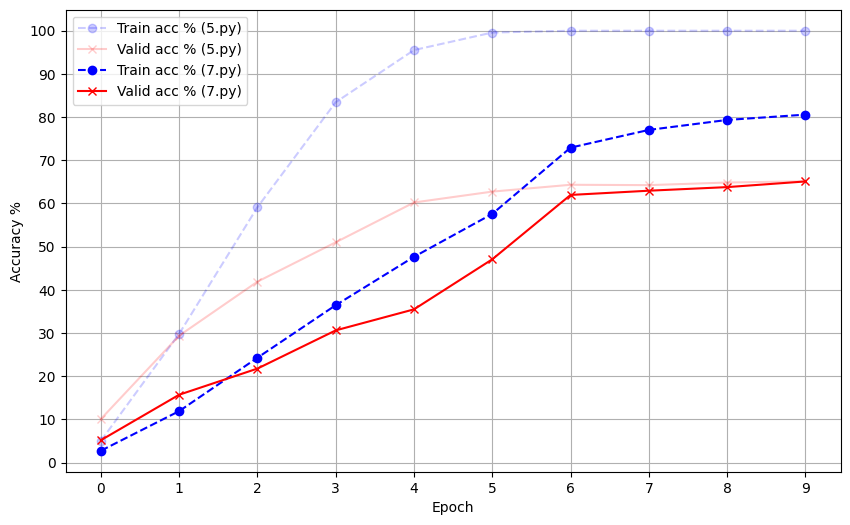

In [86]:
x = df_5['epoch']
y1 = df_5['train_acc']
y2 = df_5['valid_acc']

y1_6 = df_6['train_acc']
y2_6 = df_6['valid_acc']

y1_7 = df_7['train_acc']
y2_7 = df_7['valid_acc']

# Set the figure size
plt.figure(figsize=(10, 6))

plt.plot(x, y1, linestyle='dashed', marker='o', color='b', alpha=0.2, label='Train acc % (5.py)')
plt.plot(x, y2, linestyle='solid', marker='x', color='r', alpha=0.2, label='Valid acc % (5.py)')

plt.plot(x, y1_7, linestyle='dashed', marker='o', color='b', label='Train acc % (7.py)')
plt.plot(x, y2_7, linestyle='solid', marker='x', color='r', label='Valid acc % (7.py)')

# Add a legend
plt.legend()

# Set the x and y labels
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')
plt.xticks([i for i in range(0,10)])
plt.yticks([i for i in range(0,101,10)])
plt.grid()
# Show the plot
plt.show()


In [22]:
import os
import random
import numpy as np

In [24]:
def get_n_images(directory, n):
    filenames = []

    # Recursively search the directory for files with a .jpg extension
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg"):
                filenames.append(os.path.join(root, file))
                if len(filenames) > 1000:
                    break

    # Shuffle the list of filenames so that the images are chosen randomly
    random.shuffle(filenames)
    return filenames[:n]

In [25]:
file_names = get_n_images("data/image/", 10)

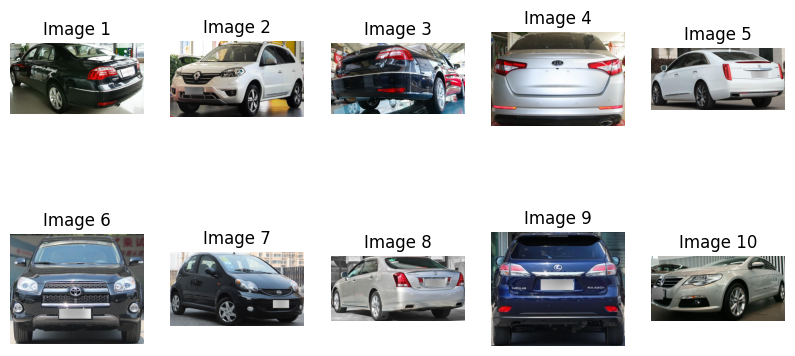

In [26]:
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(5):
    image = Image.open(file_names[i])
    image_array = np.array(image)
    axs[0, i].imshow(image_array)
    axs[0, i].axis('off')
    title = axs[0, i].set_title("Image {}".format(i+1))

for i in range(5, 10):
    image = Image.open(file_names[i])
    image_array = np.array(image)
    axs[1, i-5].imshow(image_array)
    axs[1, i-5].axis('off')
    title = axs[1, i-5].set_title("Image {}".format(i+1))

plt.show()


In [27]:
import torch
import torchvision.transforms as transforms

from pathlib import Path
from PIL import Image
from torch.utils import data as D

INPUT_SIZE = 224

train_transforms = transforms.Compose(
    [
        transforms.Resize((INPUT_SIZE, INPUT_SIZE)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomPerspective(p=0.5),

        transforms.RandomApply(torch.nn.ModuleList([
            transforms.ColorJitter(contrast=0.5, saturation=0.5, hue=0.5),
        ]), p=0.5),

        transforms.RandomApply(torch.nn.ModuleList([
            transforms.Grayscale(num_output_channels=3),
        ]), p=0.5),
    ]
)

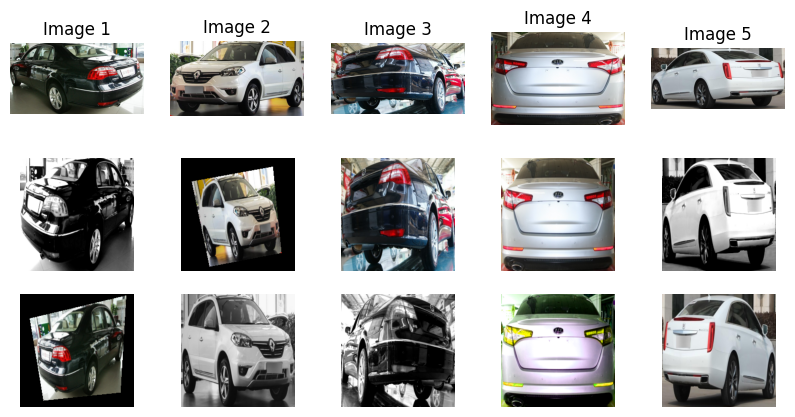

In [28]:
fig, axs = plt.subplots(3, 5, figsize=(10, 5))
for i in range(5):
    image = Image.open(file_names[i])
    image_array = np.array(image)
    transformed_image_1 = train_transforms(image)
    transformed_image_array_1 = np.array(transformed_image_1)
    transformed_image_2 = train_transforms(image)
    transformed_image_array_2 = np.array(transformed_image_2)
    
    axs[0, i].imshow(image_array)
    axs[0, i].axis('off')
    title = axs[0, i].set_title("Image {}".format(i+1))

    axs[1, i].imshow(transformed_image_1)
    axs[1, i].axis('off')
    #title = axs[1, i].set_title("Transform {}".format(i+1))
    axs[2, i].imshow(transformed_image_2)
    #title = axs[2, i].set_title("Transform {}".format(i+1))
    axs[2, i].axis('off')

plt.show()
